Necessary imports: numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create the x and y coordinates.
Use a minimal (but otherwise insignificant) offset from 0 for the starting point of y, to avoid taking the log of zero.

In [2]:
ymin = 2 * np.finfo(np.float64).eps
x = np.linspace(0.5, 4.5, 400)
y = np.linspace(ymin, 2.5, 400)

Set the contour levels. Include the -3.0 level explicitly, but keep the levels sorted (otherwise Matplotlib will complain).

In [3]:
clevels = np.sort(np.concatenate((np.linspace(-8.0, 2.0, 80), [-3.0])))

Set the critical point

In [4]:
RC = 2.5

[`meshgrid`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) is a nice utility function to create multi-dimensional coordinate sets, which repeat in all other directions. That is, the x coordinates are repeated over the y-coordinate, and vice versa for y. Both `xgrid` and `ygrid` are therefore two-dimensional.

With the two dimensional coordinate grids, we can now easily create our two dimensional function values, `z`.

In [5]:
xgrid, ygrid = np.meshgrid(x, y)
z = ygrid - np.log(ygrid) - 4 * np.log(xgrid/RC) - 4 * RC/xgrid

Let's plot!

Note that here, we have explicitly defined the contour levels. By default, Matplotlib estimates the (linearly spaced) contour levels.

We can supply `x` and `y` for the coordinates; alternatively, using `xgrid` and `ygrid` instead would also work!

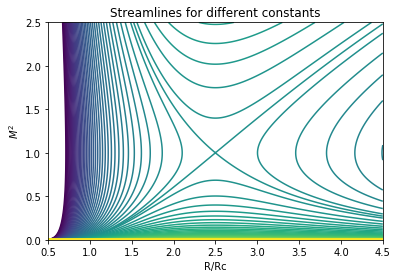

In [6]:
plt.contour(x, y, z, clevels)
plt.xlabel('R/Rc')
plt.ylabel('$M^2$')
plt.title('Streamlines for different constants');  # ; to suppress output
# Uncomment this line if you want to save to disk instead. Needs to be executed *in the same cell*
#plt.savefig('streamlines-contour.png')

For good measure, a filled contour plot with a different colour scheme (the default colour map is viridis), with the contour lines overplotted (but with only half the levels). The available colour schemes can be found at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html .

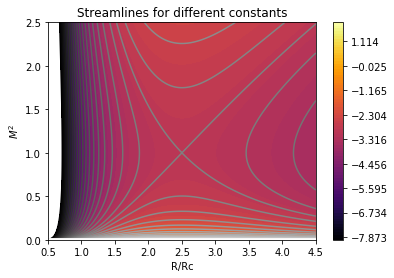

In [7]:
plt.contourf(x, y, z, clevels, cmap=plt.cm.inferno)
plt.colorbar()
plt.contour(x, y, z, clevels[::2], cmap=plt.cm.gray)
plt.xlabel('R/Rc')
plt.ylabel('$M^2$')
plt.title('Streamlines for different constants');